## Problem Set 3: Neural Networks

### Overview
In this problem set, you'll explore the foundational concepts of neural networks, covering basic architecture, activation functions, forward propagation, regularization, and adaptive learning. You'll also complete coding exercises to implement neural network components and train a basic neural network. You will both complete this Python script (`ps3.ipynb`) and submit a LaTeX report (`ps3.tex` and `ps3.pdf`).

## 1. Basic Architecture of a Neural Network

A neural network is composed of layers of neurons: input layer, hidden layer(s), and an output layer. Each neuron receives inputs, processes them, and passes the result to the next layer.

In this section, you'll implement a basic 3-layer neural network structure.

In [1]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights1 = np.random.randn(input_size, hidden_size) * 0.01
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size) * 0.01
        self.bias2 = np.zeros((1, output_size))

    def display_architecture(self):
        print("Input layer size:", self.weights1.shape[0])
        print("Hidden layer size:", self.weights1.shape[1])
        print("Output layer size:", self.weights2.shape[1])


## 2. Activation Functions


Activation functions introduce non-linearity into the network, allowing it to learn more complex patterns. Common functions include:

- **Sigmoid**: S-shaped curve, useful for binary classifications.
- **ReLU (Rectified Linear Unit)**: Outputs zero if input is negative, otherwise outputs the input.
- **Leaky ReLU**: Similar to ReLU but with a small gradient for negative inputs.

### Exercise:
Write functions for each activation function and plot them over a range of inputs.


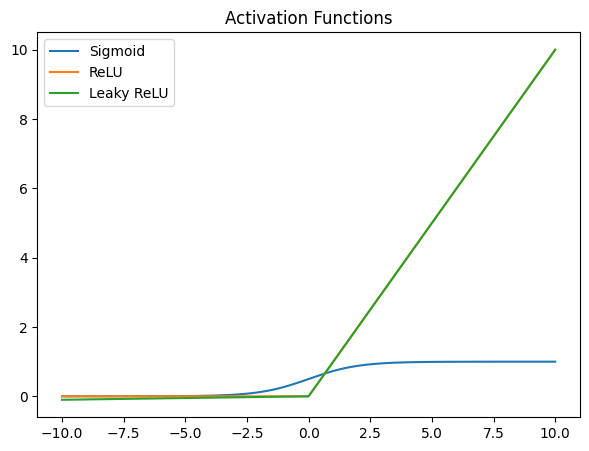

In [10]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

# Plot activation functions
x = np.linspace(-10, 10, 400)
plt.figure(figsize=(7, 5))
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, leaky_relu(x), label='Leaky ReLU')
plt.legend()
plt.title("Activation Functions")
plt.show()


## 3. Forward Propagation

Forward propagation is the process of passing inputs through the network to generate an output.

### Exercise:
Implement forward propagation for a 3-layer neural network.

In [11]:
def forward_propagation(X, weights1, bias1, weights2, bias2):
    # Layer 1
    Z1 = np.dot(X, weights1) + bias1
    A1 = relu(Z1)
    # Layer 2
    Z2 = np.dot(A1, weights2) + bias2
    A2 = sigmoid(Z2)
    return A1, A2


## 4. Overfitting and Regularization

Overfitting occurs when a model learns the noise in the training data rather than the actual pattern. Regularization helps control this.

Common techniques include:

- **L2 Regularization**: Adds a penalty based on the sum of squared weights.
- **Dropout**: Randomly ignores some neurons during training.

### Exercise:
Implement L2 regularization in the loss calculation.

In [12]:
def l2_regularization(weights1, weights2, reg_lambda):
    reg_loss = reg_lambda * (np.sum(np.square(weights1)) + np.sum(np.square(weights2)))
    return reg_loss


## 5. Training a Neural Network

Training involves adjusting the weights and biases to minimize the loss. A popular method is gradient descent.

### Exercise:
Implement a simple gradient descent loop to train the neural network.

In [13]:
def gradient_descent(X, Y, weights1, bias1, weights2, bias2, learning_rate, iterations):
    for i in range(iterations):
        # Forward propagation
        A1, A2 = forward_propagation(X, weights1, bias1, weights2, bias2)
        
        # Backpropagation
        m = X.shape[0]
        dZ2 = A2 - Y
        dW2 = (1/m) * np.dot(A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = np.dot(dZ2, weights2.T) * (A1 > 0)  # Derivative of ReLU
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
        
        # Update weights and biases
        weights1 -= learning_rate * dW1
        bias1 -= learning_rate * db1
        weights2 -= learning_rate * dW2
        bias2 -= learning_rate * db2

        # Print loss
        if i % 100 == 0:
            loss = np.mean(-Y * np.log(A2) - (1 - Y) * np.log(1 - A2))
            print(f"Iteration {i}, Loss: {loss}")


## 6. Adaptive Learning Rates


Adaptive learning rate methods, like Adam, adjust the learning rate based on past gradients, improving training stability.

### Exercise:
Implement a simple version of the Adam optimizer for gradient descent.

In [14]:
def adam_optimizer(X, Y, weights1, bias1, weights2, bias2, learning_rate, beta1, beta2, epsilon, iterations):
    m_w1, v_w1 = np.zeros_like(weights1), np.zeros_like(weights1)
    m_b1, v_b1 = np.zeros_like(bias1), np.zeros_like(bias1)
    m_w2, v_w2 = np.zeros_like(weights2), np.zeros_like(weights2)
    m_b2, v_b2 = np.zeros_like(bias2), np.zeros_like(bias2)

    for t in range(1, iterations + 1):
        # Forward propagation
        A1, A2 = forward_propagation(X, weights1, bias1, weights2, bias2)
        
        # Backpropagation
        m = X.shape[0]
        dZ2 = A2 - Y
        dW2 = (1/m) * np.dot(A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = np.dot(dZ2, weights2.T) * (A1 > 0)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
        
        # Update moving averages of gradients
        m_w1 = beta1 * m_w1 + (1 - beta1) * dW1
        v_w1 = beta2 * v_w1 + (1 - beta2) * (dW1 ** 2)
        m_b1 = beta1 * m_b1 + (1 - beta1) * db1
        v_b1 = beta2 * v_b1 + (1 - beta2) * (db1 ** 2)
        m_w2 = beta1 * m_w2 + (1 - beta1) * dW2
        v_w2 = beta2 * v_w2 + (1 - beta2) * (dW2 ** 2)
        m_b2 = beta1 * m_b2 + (1 - beta1) * db2
        v_b2 = beta2 * v_b2 + (1 - beta2) * (db2 ** 2)

        # Bias correction
        m_w1_corr = m_w1 / (1 - beta1 ** t)
        v_w1_corr = v_w1 / (1 - beta2 ** t)
        m_b1_corr = m_b1 / (1 - beta1 ** t)
        v_b1_corr = v_b1 / (1 - beta2 ** t)
        m_w2_corr = m_w2 / (1 - beta1 ** t)
        v_w2_corr = v_w2 / (1 - beta2 ** t)
        m_b2_corr = m_b2 / (1 - beta1 ** t)
        v_b2_corr = v_b2 / (1 - beta2 ** t)

        # Update weights and biases
        weights1 -= learning_rate * m_w1_corr / (np.sqrt(v_w1_corr) + epsilon)
        bias1 -= learning_rate * m_b1_corr / (np.sqrt(v_b1_corr) + epsilon)
        weights2 -= learning_rate * m_w2_corr / (np.sqrt(v_w2_corr) + epsilon)
        bias2 -= learning_rate * m_b2_corr / (np.sqrt(v_b2_corr) + epsilon)
